In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from scipy import  ndimage

In [3]:
# use 368 to 1750
N_WAVE = 2128
s = 1
start_index, end_index = 0, 2129

X = np.load("../data/HSI/Liver_map_150z25_60s_1TCPOBOP.npy", 'r')[:,:,start_index: end_index]

wavelength = np.load("../data/HSI/wavelength.npy", 'r')[start_index: end_index]

shape_X = X.shape 

X = copy.copy(X.reshape(-1, X.shape[-1]))


In [7]:
def split_Raman_af(X):
    a = X

    # remove spikes from data
    a1 = ndimage.gaussian_filter(a, (0, 10), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 20), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 30), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 40), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 50), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 60), mode='nearest')
    a = np.min([a, a1], axis=0)
    
    # Restore Edges
    c = 50
    a[:,:c] = X[:,:c]
    a[:,-c:] = X[:,-c:]
    
    #smooth everyting
    for _ in range(100):
        a1 = ndimage.gaussian_filter(a, (0, 10), mode='nearest')
        a = np.min([a, a1], axis=0)
        a[:,0] = X[:,0]
        a[:,-1] = X[:,-1]
    return a


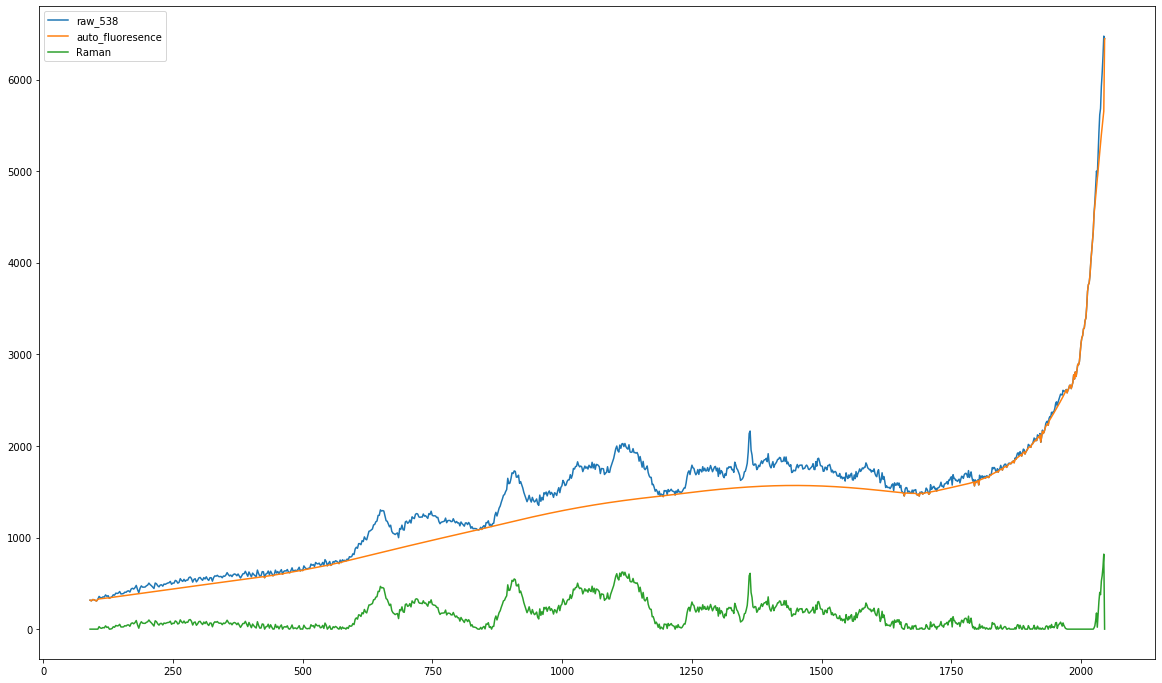

In [8]:
a = split_Raman_af(X)
i = random.randint(0,666)
i = 538
plt.figure(figsize = (20,12))
plt.plot(wavelength, X[i], label='raw_'+str(i))
plt.plot(wavelength, a[i], label='auto_fluoresence')
plt.plot(wavelength, X[i] - a[i], label='Raman')
plt.legend()
plt.show()

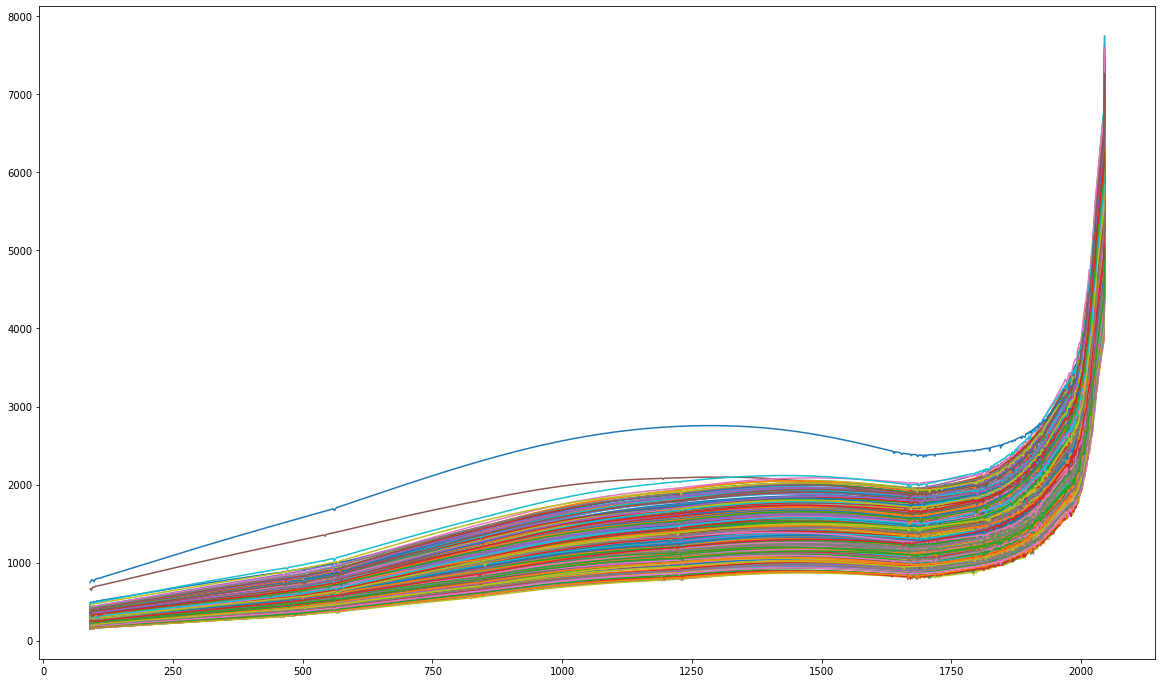

In [9]:
#Check for smoothness to see if the method works
i = random.randint(0,666)
plt.figure(figsize = (20,12))
for i in range(666):
# plt.plot(wavelength, X[i], label='raw_'+str(i))
    plt.plot(wavelength, a[i], label='auto_fluoresence')
# plt.plot(wavelength, X[i] - a[i], label='Raman')
# plt.legend()
plt.show()